Đồ Án Cuối Kì 

Họ và Tên: Nguyễn Tấn Phát

MSSV: 1712652

1.Lấy dữ liệu

-Source:https://www.kaggle.com/gregorut/videogamesales

-Tags-Title: games, video games

-Tập dữ liệu này chứa danh sách các trò chơi điện tử có doanh số bán hàng lớn hơn 100.000 bản.

-Nguồn dữ liệu:

 + Nó được tạo ra bởi một mẩu tin lưu niệm của vgchartz.com (vgchartzfull is a python script based on BeautifulSoup)
 
 + Dựa trên một tập lệnh python là BeautifulSoup để tạo ra một tập dữ liệu dựa trên dữ liệu từ http://www.vgchartz.com/gamedb/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

2.Khám phá dữ liệu

In [2]:
vgsales_df=pd.read_csv("vgsales.csv")
vgsales_df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


*Dữ liệu có bao nhiêu dòng và cột

In [3]:
vgsales_row=vgsales_df.shape[0]
vgsales_col=vgsales_df.shape[1]

In [4]:
# Dữ liệu có 16598 dòng
vgsales_row

16598

In [5]:
#Dữ liệu có 11 cột
vgsales_col

11

*Thông tin về dữ liệu

-Mỗi dòng là một đối tượng game

-Mỗi cột là thông tin cụ thể về đối tượng:

 +Rank - Ranking of overall sales
 
 +Name - The games name
 
 +Platform - Platform of the games release (i.e. PC,PS4, etc.)
 
 +Year - Year of the game's release
 
 +Genre - Genre of the game
 
 +Publisher - Publisher of the game
 
 +NA_Sales - Sales in North America (in millions)
 
 +EU_Sales - Sales in Europe (in millions)
 
 +JP_Sales - Sales in Japan (in millions)
 
 +Other_Sales - Sales in the rest of the world (in millions)
 
 +Global_Sales - Total worldwide sales.

In [6]:
#kiểu dữ liệu từng cột
vgsales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
#cols có dữ liệu NAN
#vgsales_df.columns
temp1=[]
for i in range(len(vgsales_df.columns)):
    temp1.append(vgsales_df[vgsales_df.columns[i]].isnull().sum())
col_nans_df=pd.Series(temp1,index=vgsales_df.columns)
col_nans_df

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Dữ liệu có giá trị thiếu nhưng không bất thường lắm. Việc thiếu "Year" và "Publisher" chúng ta có thể tiếp nhận vì giữa các dòng không có quá nhiều liên hệ chặt chẽ kéo theo.

*Tìm hiểu rõ hơn về dữ liệu ở các cột dữ liệu kiểu numeric "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"

 Ta sẽ tìm sales max và min của từng cột trên với các cột là "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales" và dòng là "min" và "max"

In [8]:
temp2=vgsales_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
min_df=temp2.min()
max_df=temp2.max()
col_range_df=pd.DataFrame([min_df,max_df],index=['min','max'],columns=min_df.index)
col_range_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
min,0.00,0.00,0.00,0.00,0.01
max,41.49,29.02,10.22,10.57,82.74


*Tìm hiểu về dữ liệu categorical là "Platform","Genre","Publisher"

Tìm số lượng giá trị khác nhau và tìm ra 3 giá trị đầu khi đã sort tăng dần với các cột là "Platform","Genre","Publisher" và các dòng là "count_col" và "third_col"

PS: "Name" luôn khác nhau

In [9]:
temp3=vgsales_df[["Platform","Genre","Publisher"]]
data1=[]
data2=[]
for i in range(len(temp3.columns)):
    temp4=temp3.groupby(temp3[temp3.columns[i]]).size().reset_index(name='counts')
    data1.append(temp4.shape[0])
    temp5=[]
    temp5.append(temp4.iloc[0,0])
    temp5.append(temp4.iloc[1,0])
    temp5.append(temp4.iloc[2,0])
    data2.append(temp5)
col_range_df1=pd.DataFrame([data1,data2],index=["count_col","third_col"],columns=temp3.columns)
col_range_df1

,Platform,Genre,Publisher
count_col,31,12,578
third_col,"[2600, 3DO, 3DS]","[Action, Adventure, Fighting]","[10TACLE Studios, 1C Company, 20th Century Fox..."


3.Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:

+Thể loại games/video games nào được sales: nhiều nhất và ít nhất?

+Trong 3 năm gần nhất của dữ liệu "Year" thì Publisher nào được yêu thích hay có sales cao nhất?

+Liệt kê top 3 nền tảng games/ video games nào có được sales nhiều qua các năm?

+Trong 3 năm gần đây xu hướng của games/video games?

4.Phân tích và giải quyết yêu cầu

*Thể loại games/video games nào được sales: nhiều nhất và ít nhất?

Bước 1: tính từng thể loại game với tổng sales rồi lưu vào number_salescount.

Bước 2: Vẽ barchart. Chúng ta sẽ thấy được rõ ràng sales cao nhất và thấp nhất.

In [10]:
temp6=vgsales_df[["Genre","Global_Sales"]]
number_salescount=temp6.groupby(['Genre']).count()
number_salescount

,Global_Sales
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


Text(0, 0.5, 'Genre')

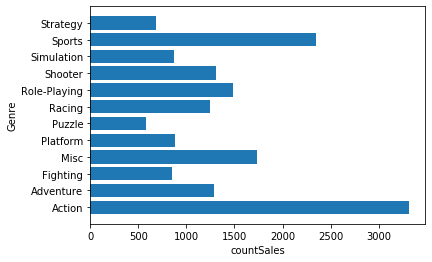

In [11]:
ax=number_salescount['Global_Sales'].values
ay=number_salescount.index
plt.barh(ay,ax)
plt.xlabel("countSales")
plt.ylabel("Genre")

-Kết luận-

Từ đồ thị trên thì ta có thể trả lời genre được sales nhiều nhất là "Action" và thấp nhất là "Puzzle". Hơn nữa ta còn biết được các vị trí sales thấp hơn, chẳng hạn như top2 sales là "Sports"

*Trong 3 năm gần nhất của dữ liệu "Year" thì Publisher nào được yêu thích hay có sales cao nhất?

Bước 1: Lọc dữ liệu ra ba năm gần nhất rồi tính tổng Publisher sales lưu vào Publishercount_df

Bước 2: Tìm sales cao nhất qua hàm max rồi lưu vào một list result_Publishersales

In [12]:
temp7=vgsales_df[["Year","Publisher","Global_Sales"]]
temp8=temp7.groupby(['Year']).count()
len_temp8=len(temp8.index)
temp7=temp7.loc[(temp7['Year']<=temp8.index[len_temp8-1])&(temp7['Year']>=temp8.index[len_temp8-3])]
temp7=temp7.groupby(['Publisher']).count()
Publishercount_df=pd.Series(temp7['Global_Sales'].values,index=temp7.index)
Publishercount_df

Publisher
505 Games                                  7
5pb                                        2
Activision                                14
Aksys Games                                2
Alternative Software                       4
                                          ..
Ubisoft                                   14
Unknown                                    4
Warner Bros. Interactive Entertainment    14
Yeti                                       1
dramatic create                            2
Length: 68, dtype: int64

In [13]:
#cách 1
result_Publishersales=[]
temp_max=max(Publishercount_df.values)
for i in range(len(Publishercount_df)):
    if(Publishercount_df.values[i]==temp_max):
        result_Publishersales.append(Publishercount_df.index[i])
result_Publishersales  

['Namco Bandai Games']

In [14]:
#cách 2
result_Publishersales1=[]
Publishercount_df=Publishercount_df.sort_values(ascending=False)
result_Publishersales1.append(Publishercount_df.index[0])
result_Publishersales1

['Namco Bandai Games']

-Kết luận-

 Publisher có sales cao nhất trong 3 năm gần nhất đó chính là Namco Bandai Games

*Liệt kê top 3 nền tảng games/ video games nào có sales nhiều nhất qua các năm?

Kết quả là một datafram với dòng là các nắm và 3 cột là top1,top2,top3

In [15]:
#chỉnh sửa type year
temp9=vgsales_df[["Year","Platform","Global_Sales"]]
temp9= temp9.dropna(axis=0, subset=['Year'])
temp9['Year']=temp9['Year'].astype(int)
tempyear=temp9.groupby(['Year']).count()
len_tempy=len(tempyear.index)

In [16]:
#vì năm không liên tuc nên làm riêng 2020
temp_2020=[]
temp9=temp9.groupby(['Year','Platform']).size().reset_index(name='counts')
temp2020=temp9.loc[temp9['Year']==2020]
temp2020=temp2020.sort_values(by='counts',ascending=False)
temp_2020.append(temp2020['Platform'].values[0])
temp_2020

['DS']

In [17]:
#tiếp tục các năm còn lại
temp_data=[]
temp_index=[]
for i in range(tempyear.index[0],tempyear.index[len_tempy-1],1):
    temp10=[]
    temp11=temp9.loc[temp9['Year']==i]
    if(len(temp11)>2):
        temp11=temp11.sort_values(by='counts',ascending=False)
        temp10.append(temp11['Platform'].values[0])
        temp10.append(temp11['Platform'].values[1])
        temp10.append(temp11['Platform'].values[2])
        temp_data.append(temp10)
        temp_index.append(i)
    elif(len(temp11)>1):
        temp11=temp11.sort_values(by='counts',ascending=False)
        temp10.append(temp11['Platform'].values[0])
        temp10.append(temp11['Platform'].values[1])
        temp_data.append(temp10)
        temp_index.append(i)
    elif(len(temp11)==1):
        temp10.append(temp11['Platform'].values[0]) 
        temp_data.append(temp10)
        temp_index.append(i)
temp_data.append(temp_2020)
temp_index.append(2020)
temp_data
Top_Platform=pd.DataFrame(temp_data,index=temp_index,columns=["Top1","Top2","Top3"])
Top_Platform

,Top1,Top2,Top3
1980,2600,None,None
1981,2600,None,None
1982,2600,None,None
1983,2600,NES,None
1984,NES,2600,None
1985,NES,2600,DS
1986,NES,2600,None
1987,NES,2600,None
1988,NES,2600,GB
1989,GB,NES,2600


-Kết luận-

Ta có thể thấy được ban đầu thì nền tảng game hầu như chỉ có một là "2600". Nó chiếm đóng vị trí số 1 gần cả thập kỉ. Qua mỗi nắm nền tảng games thì xuất hiện rất nhiều nên cũng có nhiều sự biến đổi tuy nhiên vẫn thấy được nhiều nền tảng xuất sắc như "DS", "DC", "3DS"...

*Trong 3 năm gần đây xu hướng của games/video games?

Bước 1: Lọc dữ liệu của 3 năm gần nhất với xu hướng game.

Bước 2: Sắp xếp tắng dần rồi lấy ra 3 vị trí đầu. Kết quả là một lits

In [18]:
#b1
temp12=vgsales_df[["Year","Genre","Global_Sales"]]
temp13=temp12.groupby(['Year']).count()
len_temp13=len(temp13.index)
temp12=temp12.loc[(temp12['Year']<=temp13.index[len_temp13-1])&(temp12['Year']>=temp13.index[len_temp13-3])]
temp12=temp12.groupby(['Genre']).count()
#b2
temp12=temp12.sort_values(by='Global_Sales',ascending=False)
result_Genre3y=[]
result_Genre3y.append(temp12.index[0])
result_Genre3y.append(temp12.index[1])
result_Genre3y.append(temp12.index[2])
result_Genre3y

['Action', 'Role-Playing', 'Sports']

-Kết luận-

Ba năm gần đây thể loại game được yêu thích:

-Top1: Action

-Top2: Role-Playing

-Top3: Sports

5.

Khó khăn:

-Không thuộc những hàm có sẵn phải lên trang mạng tìm kiếm

-Suy nghĩ ý tưởng câu hỏi và trả lời

-Vẫn chưa quen với các phím tắt cơ bản 

Hữu ích:

-Nắm bắt kiến thức hơn trước, nhớ được những hàm thông dụng, làm quen lại với viết code theo trình tự.

****Cần trao dồi nhiều kiến thức nếu có thời gian

6.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.bar.html

https://www.geeksforgeeks.org/python-programming-language/

https://www.journaldev.com/33472/pandas-dataframe-from_dict-convert-dictionary-to-dataframe